In [1]:
import os
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA

In [2]:
sys.path.append("../../src/.")
import plotting_functions as pf

In [3]:
DIR = "../../data/"
SUBWAYUS = "Subway USA/subway_usa_"

In [4]:
train_df = pd.read_csv(DIR + SUBWAYUS + "processed_train.csv", index_col="store")
test_df = pd.read_csv(DIR + SUBWAYUS + "processed_test.csv", index_col="store")

In [5]:
def agg_inrix(df):
    inrix_columns = []
    for col in df.columns.tolist():
        if 'inrix_' in col:
            inrix_columns.append(col)
    df['inrix_total_ta'] = df[inrix_columns].sum(axis=1)
    df.drop(columns=inrix_columns, inplace=True)

agg_inrix(train_df)
agg_inrix(test_df)

In [6]:
result_df = pd.DataFrame([], index=train_df.index)

## PCA

### Test for Mininum Components to Capture 90% Variance

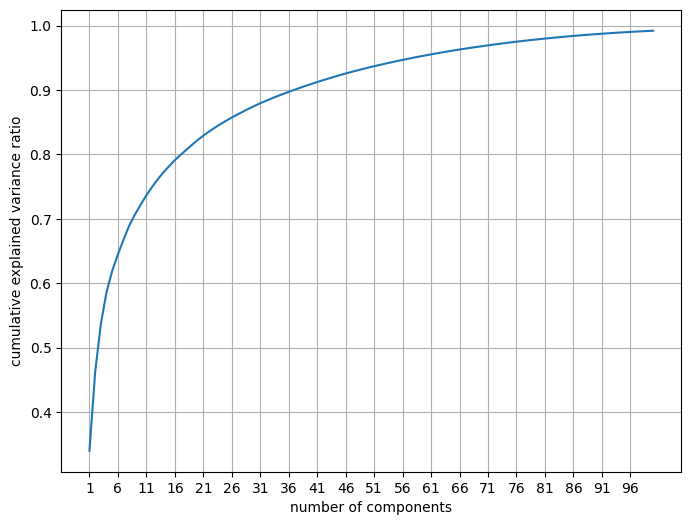

37

In [7]:
pf.pca_plot(train_df)

### PCA model (90% Variance) - Layer 1

In [8]:
pca_1 = PCA(n_components=37, whiten=True, random_state=42)
pca_1.fit(train_df)

PCA(n_components=37, random_state=42, whiten=True)

#### Filter and Count Important Features (of heavy weights)

Filter the values in the PCA component matrix, and count the occurrence of the features in the filtered matrix.

In [9]:
W = abs(pca_1.components_)
features = train_df.columns
long_results = []
for i in range(W.shape[0]):
    array = W[i]
    heavy_idx = np.where(array > 0.15)
    long_results += list(features[heavy_idx])

In [10]:
count = pd.Series(long_results).value_counts()
pca_features = count.index.tolist()
count

market_size                        12
military_installations_1mi         10
emp_transportation_storage_p_ta     9
gq_other_p_ta                       8
emp_publicadmin_p_ta                8
                                   ..
hh_type_fam_p_ta                    1
age85pl_p_ta                        1
hhinc30lt_p_ta                      1
hh_inc_gt_75k_p_ta                  1
places_of_worship_1mi               1
Name: count, Length: 120, dtype: int64

In [11]:
weighted_W = pca_1.explained_variance_ratio_ * W.T
pca_feature_weight = pd.Series(np.sum(weighted_W, axis=1), index=train_df.columns.tolist())
pca_feature_weight = pca_feature_weight.filter(items=pca_features, axis=0)
pca_feature_weight.sort_values(ascending=False, inplace=True)
pca_feature_weight

inrix_total_ta                      0.374531
market_size                         0.107910
nces_public_schools_nearest_dist    0.073560
hu_ownerocc_ta                      0.051302
white_p_ta                          0.050944
                                      ...   
emp_utilities_p_ta                  0.023707
occ_military_p_ta                   0.022503
emp_military_ta                     0.022502
emp_accommodation_foodserv_p_ta     0.022119
other_p_ta                          0.017861
Length: 120, dtype: float64

In [12]:
important_features = pca_feature_weight[:60].index.tolist()

In [13]:
reduced_train = train_df[pca_features]
reduced_test = test_df[pca_features]
reduced_train

,market_size,military_installations_1mi,emp_transportation_storage_p_ta,gq_other_p_ta,emp_publicadmin_p_ta,emp_wholesale_trade_p_ta,emp_mining_p_ta,transitstop_nearest_dist,emp_arts_entertainment_p_ta,hh_type_male_child_p_ta,...,hh_expected_pers_ta,hh_type_1pers_p_ta,dtpop_unemployed_p_ta,hrsa_number_of_certified_beds_2mi,hrsa_hospitals_3mi,hh_type_fam_p_ta,age85pl_p_ta,hhinc30lt_p_ta,hh_inc_gt_75k_p_ta,places_of_worship_1mi
store,,,,,,,,,,,,,,,,,,,,,
5386700,4.0,-0.082631,1.538831,-0.874510,-0.270970,0.321934,-0.329934,0.173092,0.455597,-0.703362,...,-0.921958,-0.921958,-0.588669,-0.352700,-0.633117,0.848228,-0.344824,-0.518210,0.277339,-0.304795
2230200,0.0,-0.082631,-0.688641,2.510505,0.138317,-0.989126,-0.329934,-0.482872,0.495531,0.672875,...,-1.402529,-1.402529,0.353116,-0.352700,-0.633117,1.350859,-1.126964,-1.484616,1.680984,-0.262357
4931100,4.0,-0.082631,-0.596695,2.510505,2.172304,-0.243178,-0.329934,-0.484493,0.341498,1.120763,...,-1.493760,-1.493760,1.871505,-0.352700,-0.633117,1.102466,-0.899252,-0.178548,0.035529,-0.304795
2495200,1.0,-0.082631,-0.380177,-0.728955,-0.854554,0.175005,-0.329934,-0.431710,-0.228996,-1.322261,...,-0.447812,-0.447812,-1.194103,-0.352700,-0.633117,0.616395,1.219455,-1.140748,1.409126,-0.219918
2305300,3.0,-0.082631,0.088453,0.470356,-0.246070,-0.028435,-0.329934,-0.457116,0.090480,1.527934,...,-0.433678,-0.433678,1.439052,-0.268937,-0.242392,0.210199,-0.097312,-0.516107,0.018359,0.416662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401900,0.0,-0.082631,-0.166624,0.425674,-0.401693,-0.683966,-0.329934,-0.472782,-0.263226,0.615871,...,-0.162554,-0.162554,0.420386,-0.160744,-0.242392,0.087463,-0.364625,-0.652813,0.575667,0.162030
5048900,0.0,-0.082631,1.488409,1.285130,-0.459273,1.406950,-0.170505,-0.463896,-0.246111,-1.094245,...,-0.210097,-0.210097,-0.204267,-0.352700,-0.633117,0.193639,-0.463630,-1.066085,1.220257,-0.177479
1024900,5.0,-0.082631,0.135909,-0.415841,0.097856,-0.446619,-0.329934,0.362274,0.033431,0.778740,...,0.406678,0.406678,-0.752040,0.107993,-0.242392,0.003692,0.031395,0.771033,-0.763590,0.416662


In [14]:
def corr_pair(target_corr, corr_threshold=0.6):
    np.fill_diagonal(target_corr.values, 0)
    sorted_pair = target_corr.abs().unstack().sort_values(kind="quicksort", ascending=False)
    return sorted_pair[sorted_pair > corr_threshold]

correlated_pairs = corr_pair(reduced_train.corr())

In [15]:
correlated_pairs[:20:2]

hh_expected_pers_ta                 hh_type_1pers_p_ta             1.000000
hh_inc_lt_75k_p_ta                  hh_inc_gt_75k_p_ta             1.000000
occ_military_p_ta                   emp_military_ta                1.000000
popgrpy_ta                          pop5y_cagr_ta                  0.999143
                                    hhgrpycy_ta                    0.996633
dtpop_students_post_secondary_p_ta  dtpop_students_p_ta            0.996588
hhgrfypy_ta                         popgrfy_ta                     0.996356
hhgrpycy_ta                         pop5y_cagr_ta                  0.996161
dtpop_students_prek_8th_p_ta        dtpop_children_at_home_p_ta    0.991793
disposable_inc_avg_ta               hhinc100pl_p_ta                0.989908
dtype: float64

In [16]:
def corr_pair_drop(feature_pairs, corr_with_target):
    selected, discarded = [], []
    for f1, f2 in feature_pairs:
        if abs(corr_with_target[f1]) < abs(corr_with_target[f2]):
            selected.append(f2)
            discarded.append(f1)
        else:
            selected.append(f1)
            discarded.append(f2)
    final_discarded = set(discarded) - set(selected) 
    return list(final_discarded)

In [17]:
corr_drop_list = corr_pair_drop(correlated_pairs.index, pca_feature_weight)

In [50]:
corr_drop_list

['dmm_count_1mi',
 'military_installations_5mi',
 'dmm_gla_1mi',
 'osm_highway_exits_count_1mi',
 'hrsa_hospitals_1mi']

In [18]:
important_features = list(set(important_features) - set(corr_drop_list))

In [19]:
reduced_train.drop(columns=corr_drop_list, inplace=True)
reduced_test.drop(columns=corr_drop_list, inplace=True)

/var/folders/t1/c4fmzstn5v92jwsl8z5vhpp40000gn/T/ipykernel_87104/1625573170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_train.drop(columns=corr_drop_list, inplace=True)
/var/folders/t1/c4fmzstn5v92jwsl8z5vhpp40000gn/T/ipykernel_87104/1625573170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_test.drop(columns=corr_drop_list, inplace=True)


In [20]:
correlated_pairs = corr_pair(reduced_train.corr())
correlated_pairs[:20:2]

hh_expected_pers_ta    hh_type_1pers_p_ta       1.000000
pop5y_cagr_ta          popgrpy_ta               0.999143
popgrfy_ta             hhgrfypy_ta              0.996356
hhinc100pl_p_ta        disposable_inc_avg_ta    0.989908
medhhinc_ta            disposable_inc_avg_ta    0.984498
                       hhinc100pl_p_ta          0.979840
avghhinc_ta            hhinc150pl_p_ta          0.978147
disposable_inc_avg_ta  hhinc150pl_p_ta          0.975705
avg_faminc_ta          disposable_inc_avg_ta    0.974975
hh_inc_lt_75k_p_ta     hhinc100pl_p_ta          0.973601
dtype: float64

### PCA model (90% Variance) - Layer 2

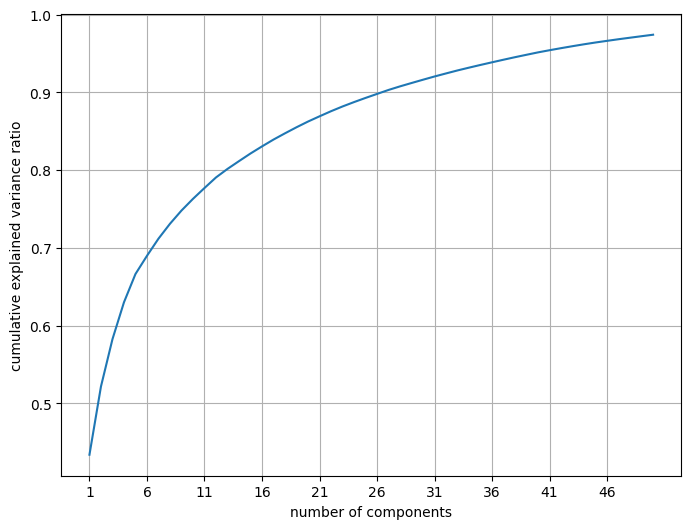

27

In [21]:
pf.pca_plot(reduced_train, n_components=50)

In [36]:
pca_2 = PCA(n_components=27, whiten=True, random_state=42)
pca_2.fit(reduced_train)

PCA(n_components=27, random_state=42, whiten=True)

#### Filter and Count Important Features (of heavy weights)

Filter the values in the PCA component matrix, and count the occurrence of the features in the filtered matrix.

In [38]:
W = abs(pca_2.components_)
features = transformed_features.columns
long_results = []
for i in range(W.shape[0]):
    array = W[i]
    heavy_idx = np.where(array > 0.15)
    long_results += list(features[heavy_idx])

In [40]:
count = pd.Series(long_results).value_counts()
count[:10]

dtpop_students_9th_12th_p_ta        11
market_size                         11
emp_management_p_ta                 10
genx_p_ta                           10
military_installations_5mi           9
emp_mining_p_ta                      9
ipeds_postsecondary_nearest_dist     8
emp_information_p_ta                 8
transitstop_nearest_dist             8
hh_type_female_nochild_p_ta          8
Name: count, dtype: int64

In [41]:
pca_2_features = count.index.tolist()

In [43]:
weighted_W = pca_2.explained_variance_ratio_ * W.T
pca_2_feature_weight = pd.Series(np.sum(weighted_W, axis=1), index=reduced_train.columns.tolist())
pca_2_feature_weight = pca_2_feature_weight.filter(items=pca_2_features, axis=0)
pca_2_feature_weight.sort_values(ascending=False, inplace=True)
pca_2_feature_weight

inrix_total_ta                           0.579642
market_size                              0.138858
nces_public_schools_nearest_dist         0.097075
ipeds_postsecondary_nearest_dist         0.069939
centerxy_gla_effective_2mi               0.060891
dmm_gla_2mi                              0.058945
asian_p_ta                               0.058917
age0018_p_ta                             0.056677
transitstop_nearest_dist                 0.056286
emp_publicadmin_p_ta                     0.055368
dmm_gla_1mi                              0.055230
military_installations_1mi               0.055064
genx_p_ta                                0.054308
hrsa_hospitals_2mi                       0.054265
dmm_count_1mi                            0.054075
osm_highway_exits_count_2mi              0.052637
military_installations_3mi               0.052265
age65pl_p_ta                             0.052173
black_p_ta                               0.051868
com0002_p_ta                             0.051535


In [44]:
pca_2_feature_weight = pca_2_feature_weight.sort_values(ascending=False)
important_features_2 = pca_2_feature_weight[:40].index.tolist()

In [45]:
important_features = list(set(important_features + important_features_2))

In [46]:
reduced_train = reduced_train[important_features]
reduced_test = reduced_test[important_features]
reduced_train

,places_of_worship_2mi,dmm_nearest_dist,dmm_gla_1mi,pop5y_cagr_ta,dmm_gla_3mi,nces_public_schools_1mi,com0508_p_ta,emp_healthcare_social_assistance_p_ta,market_size,osm_highway_exits_count_2mi,...,dmm_count_1mi,centerxy_gla_effective_2mi,com12pl_p_ta,hh_type_married_p_ta,mortgage_avgrisk_ta,edu_bachplus_p_ta,black_p_ta,white_p_ta,dtpop_students_9th_12th_p_ta,asian_p_ta
store,,,,,,,,,,,,,,,,,,,,,
5386700,-0.424219,-0.148461,-0.408427,-0.415085,-0.771501,-0.492299,0.300941,-1.576735,4.0,0.097112,...,-0.462636,-0.718649,0.300459,0.986612,-0.307314,-1.000234,-0.644922,1.056634,0.480382,-0.517596
2230200,-0.067795,-0.451189,-0.408427,-0.132906,1.833203,0.129552,-0.380899,0.493764,0.0,-0.672945,...,-0.462636,0.169134,0.802574,1.217826,1.685651,0.382813,0.654314,-0.892188,1.890112,0.505259
4931100,-0.314550,-0.023897,-0.408427,1.832617,-0.771501,0.336836,1.333766,-1.388615,4.0,0.097112,...,-0.462636,-0.718649,-0.417792,0.581547,1.382835,-0.951299,-0.527035,-0.488701,2.979449,0.307770
2495200,-0.287133,-0.417848,-0.408427,0.059275,0.808493,-0.285015,1.272123,0.322104,1.0,-0.672945,...,-0.462636,0.282577,-0.790603,1.486987,-0.433005,1.901717,-0.661674,0.892900,-0.993427,0.497087
2305300,-0.150047,0.543154,-0.408427,1.179865,-0.771501,-0.077731,-1.279117,0.432625,3.0,-0.480430,...,-0.462636,-0.337523,0.518954,0.403283,1.384590,-0.577851,-0.711311,0.794270,0.928932,-0.576161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401900,0.507966,-0.451088,-0.408427,-0.720671,0.732439,0.336836,0.224203,1.916424,0.0,0.193369,...,-0.462636,2.896967,0.063559,0.010573,1.432339,-0.112328,-0.053627,-0.448158,0.095910,1.212132
5048900,-0.012961,-0.477340,1.005694,-0.321560,0.306396,0.544120,0.070726,0.070493,0.0,0.963427,...,0.637963,1.284861,-0.237522,0.563897,-0.092272,1.481265,-0.163448,-0.688690,-1.313820,3.343646
1024900,-0.081504,1.592733,-0.408427,-0.325514,-0.771501,0.336836,-0.791010,-0.464474,5.0,-0.672945,...,-0.462636,-0.268999,-0.620715,-0.729840,-0.775669,-0.278448,2.031107,-0.520278,-0.288562,-0.569351


In [47]:
def corr_pair(target_corr, corr_threshold=0.6):
    np.fill_diagonal(target_corr.values, 0)
    sorted_pair = target_corr.abs().unstack().sort_values(kind="quicksort", ascending=False)
    return sorted_pair[sorted_pair > corr_threshold]

correlated_pairs = corr_pair(reduced_train.corr())

In [49]:
correlated_pairs[:40:2]

popgrpy_ta                         pop5y_cagr_ta                  0.999143
hhgrfypy_ta                        popgrfy_ta                     0.996356
popgrfy_ta                         pop5y_cagr_ta                  0.926834
pop5y_cagr_ta                      hhgrfypy_ta                    0.925084
popgrfy_ta                         popgrpy_ta                     0.923534
popgrpy_ta                         hhgrfypy_ta                    0.921387
osm_highway_exits_count_3mi        osm_highway_exits_count_2mi    0.909772
dmm_gla_2mi                        dmm_count_2mi                  0.893746
dmm_count_1mi                      dmm_gla_1mi                    0.884128
hh_type_female_nochild_p_ta        hh_type_female_p_ta            0.880320
hrsa_number_of_certified_beds_2mi  hrsa_hospitals_2mi             0.851553
boomer_p_ta                        age65pl_p_ta                   0.840754
hrsa_hospitals_3mi                 hrsa_hospitals_2mi             0.835198
centerxy_gla_effective_3m

In [33]:
print(pca_feature_weight['military_installations_5mi'], pca_feature_weight['military_installations_3mi'])
print(pca_feature_weight['centerxy_gla_effective_1mi'], pca_feature_weight['dmm_gla_1mi'])
print(pca_feature_weight['osm_highway_exits_count_2mi'], pca_feature_weight['osm_highway_exits_count_1mi'])

0.03782548252596881 0.041533142106797136
0.036444494335065775 0.03868716193509502
0.04243214809911437 0.03517307532439087


In [34]:
corr_drop_list = ['dmm_count_1mi', 'military_installations_5mi', 'dmm_gla_1mi', 'osm_highway_exits_count_1mi', 'hrsa_hospitals_1mi']

In [35]:
reduced_train.drop(columns=corr_drop_list, inplace=True)
reduced_test.drop(columns=corr_drop_list, inplace=True)

KeyError: "['military_installations_5mi', 'osm_highway_exits_count_1mi', 'hrsa_hospitals_1mi'] not found in axis"

In [ ]:
correlated_pairs = corr_pair(reduced_train.corr())
correlated_pairs[:100:2]